# Credit Card Dataset

In [113]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pprint as pp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

### Data exploration and analysis

In [114]:
application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')

In [115]:
application_record.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [116]:
credit_record.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [117]:
application_record.shape

(438557, 18)

In [118]:
credit_record.shape

(1048575, 3)

In [119]:
application_record.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [120]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


### Data cleaning

In [121]:
application_record.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [122]:
credit_record.isnull().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [123]:
application_record.fillna("Unemployed", inplace = True)

In [124]:
data_application = application_record[["ID","CODE_GENDER","AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED"]]

In [125]:
data_credit = credit_record[["ID","STATUS"]]

In [126]:
data_application.head()

,ID,CODE_GENDER,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED
0,5008804,M,427500.0,-12005,-4542
1,5008805,M,427500.0,-12005,-4542
2,5008806,M,112500.0,-21474,-1134
3,5008808,F,270000.0,-19110,-3051
4,5008809,F,270000.0,-19110,-3051


In [127]:
data_credit.head()

,ID,STATUS
0,5001711,X
1,5001711,0
2,5001711,0
3,5001711,0
4,5001712,C


In [128]:
data_merged = pd.merge(data_application, data_credit, on='ID')

In [129]:
data_merged.head()

,ID,CODE_GENDER,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,STATUS
0,5008804,M,427500.0,-12005,-4542,C
1,5008804,M,427500.0,-12005,-4542,C
2,5008804,M,427500.0,-12005,-4542,C
3,5008804,M,427500.0,-12005,-4542,C
4,5008804,M,427500.0,-12005,-4542,C


In [130]:
data_merged.isnull().sum()

ID                  0
CODE_GENDER         0
AMT_INCOME_TOTAL    0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
STATUS              0
dtype: int64

In [131]:
data_merged['CODE_GENDER'] = data_merged['CODE_GENDER'].replace("M", 1)
data_merged['CODE_GENDER'] = data_merged['CODE_GENDER'].replace("F", 0)

In [132]:
data_merged['STATUS'] = data_merged['STATUS'].replace("X", 0)
data_merged['STATUS'] = data_merged['STATUS'].replace("C", 0)
data_merged['STATUS'] = data_merged['STATUS'].replace("0", 1)
data_merged['STATUS'] = data_merged['STATUS'].replace("1", 1)
data_merged['STATUS'] = data_merged['STATUS'].replace("2", 1)
data_merged['STATUS'] = data_merged['STATUS'].replace("3", 1)
data_merged['STATUS'] = data_merged['STATUS'].replace("4", 1)
data_merged['STATUS'] = data_merged['STATUS'].replace("5", 1)

In [133]:
data_merged["CODE_GENDER"].dtype

dtype('int64')

In [134]:
data_merged["STATUS"].dtype

dtype('int64')

### Data splitting

In [135]:
x = data_merged.drop(['STATUS'], axis=1)
y = data_merged["STATUS"]

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### Model building

In [137]:
random_forest_model = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=10)

### Model training

In [138]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=10)

In [139]:
y_pred = random_forest_model.predict(x_test)

### Model evaluation

In [140]:
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1

0.6328217920446436

In [141]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77     94973
           1       0.78      0.08      0.15     60570

    accuracy                           0.63    155543
   macro avg       0.70      0.53      0.46    155543
weighted avg       0.68      0.63      0.52    155543



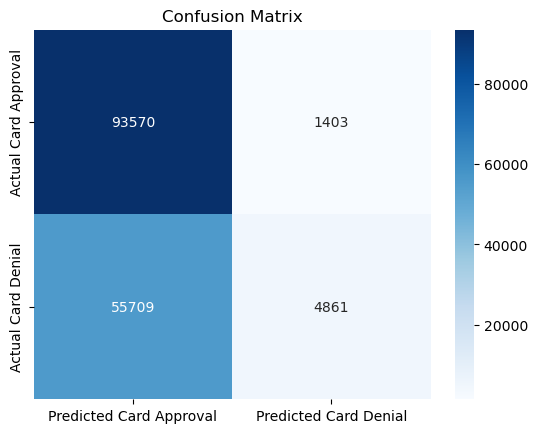

In [142]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Card Approval', 'Predicted Card Denial'], yticklabels=['Actual Card Approval', 'Actual Card Denial'])
plt.title('Confusion Matrix')
plt.show()

### Hyperparameter tuning

In [143]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [144]:
random_forest_model = RandomForestClassifier(n_estimators = 50, max_depth=None, min_samples_leaf=2)

In [145]:
random_forest_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50)

In [146]:
y_pred = random_forest_model.predict(x_test)

In [147]:
accuracy2 = accuracy_score(y_test, y_pred)
accuracy2

0.7906688182689031

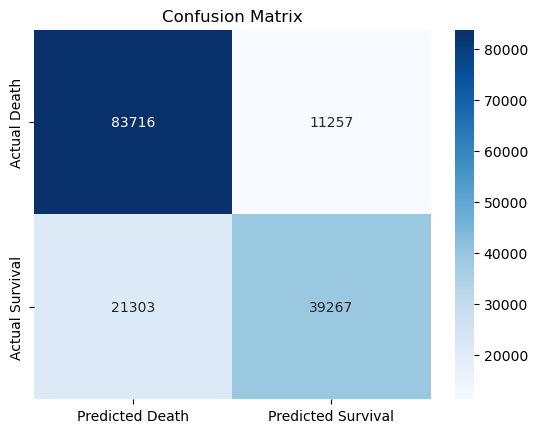

In [148]:
cm2 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Death', 'Predicted Survival'], yticklabels=['Actual Death', 'Actual Survival'])
plt.title('Confusion Matrix')
plt.show()

### Model comparison

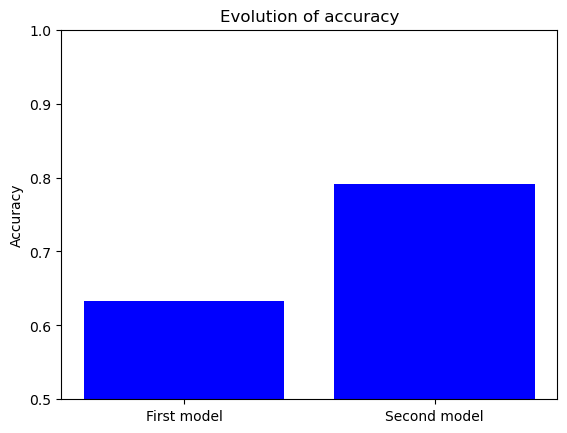

In [149]:
categories = ['First model', 'Second model']
values = [accuracy1, accuracy2]
plt.bar(categories, values, color='blue')
plt.ylim(0.5,1)
plt.title('Evolution of accuracy')
plt.ylabel('Accuracy')
plt.show()

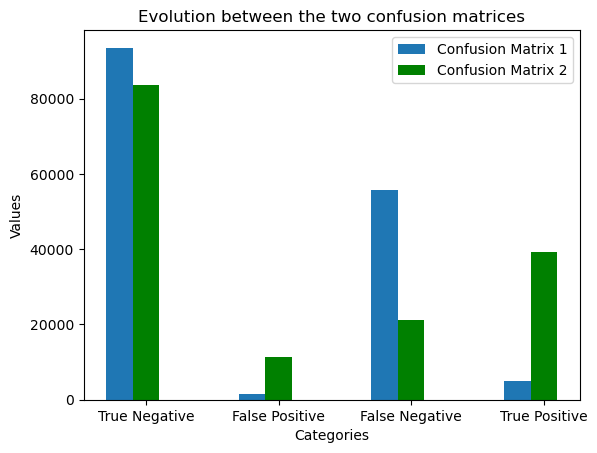

In [150]:
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
values_cm1 = cm1.flatten()
values_cm2 = cm2.flatten()
bar_width = 0.2
index = np.arange(len(categories))
plt.bar(index - bar_width, values_cm1, width=bar_width, label='Confusion Matrix 1')
plt.bar(index, values_cm2, width=bar_width, label='Confusion Matrix 2', color='green')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Evolution between the two confusion matrices')
plt.xticks(index, categories)
plt.legend()
plt.show()

### Model saving

In [162]:
joblib.dump(random_forest_model, "CreditCard_model.joblib", compress=9)

['CreditCard_model.joblib']